# Alocação e otimização de portfólios com algoritmos 

## Importação das bibliotecas e base de dados

In [ ]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = yf.download('BRCO11.SA HGLG11.SA VTLT11.SA FIIP11B.SA SDIL11.SA VILG11.SA GGRC11.SA',start="2020-03-18", end="2023-02-28")
acoes=data['Adj Close']
acoes.tail()
 

[*********************100%***********************]  7 of 7 completed


,BRCO11.SA,FIIP11B.SA,GGRC11.SA,HGLG11.SA,SDIL11.SA,VILG11.SA,VTLT11.SA
Date,,,,,,,
2023-02-17,93.410004,143.490005,101.199997,161.649994,87.730003,88.300003,88.669998
2023-02-22,93.599998,143.360001,101.180000,160.160004,87.930000,88.650002,87.989998
2023-02-23,93.120003,141.009995,102.000000,160.419998,87.870003,87.570000,87.449997
2023-02-24,93.800003,144.399994,102.389999,161.279999,88.290001,88.110001,87.870003
2023-02-27,92.809998,144.419998,103.089996,161.660004,88.730003,87.589996,87.720001


In [ ]:
acoes.to_csv('acoes.csv')


In [ ]:
dataset = pd.read_csv('acoes.csv')
dataset

,Date,BRCO11.SA,FIIP11B.SA,GGRC11.SA,HGLG11.SA,SDIL11.SA,VILG11.SA,VTLT11.SA
0,2020-03-18,88.315048,129.811996,88.900429,106.610985,65.044106,82.484612,80.677956
1,2020-03-19,87.850243,127.539490,86.418198,118.050827,65.609077,83.882637,75.420288
2,2020-03-20,90.174309,137.149033,91.925064,123.870934,71.532127,90.453468,79.318222
3,2020-03-23,87.199501,128.003265,89.176208,121.493713,64.697845,82.018593,79.318222
4,2020-03-24,92.033592,128.467056,91.014908,127.514206,69.254044,84.814667,85.210434
...,...,...,...,...,...,...,...,...
727,2023-02-17,93.410004,143.490005,101.199997,161.649994,87.730003,88.300003,88.669998
728,2023-02-22,93.599998,143.360001,101.180000,160.160004,87.930000,88.650002,87.989998
729,2023-02-23,93.120003,141.009995,102.000000,160.419998,87.870003,87.570000,87.449997
730,2023-02-24,93.800003,144.399994,102.389999,161.279999,88.290001,88.110001,87.870003


## Alocação aleatória de ativos

In [ ]:
len(dataset.columns) - 1

7

In [ ]:
#dataset.loc[len(dataset) - 1]['TESLA']

In [ ]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0, melhores_pesos = []):
  dataset = dataset.copy()

  if seed != 0:
    np.random.seed(seed)

  if len(melhores_pesos) > 0:
    pesos = melhores_pesos
  else:  
    pesos = np.random.random(len(dataset.columns) - 1)
    #print(pesos, pesos.sum())
    pesos = pesos / pesos.sum()
    #print(pesos, pesos.sum())

  colunas = dataset.columns[1:]
  #print(colunas)
  for i in colunas:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    #print(i, acao)
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
  
  dataset['soma valor'] = dataset.sum(axis = 1)

  datas = dataset['Date']
  #print(datas)

  dataset.drop(labels = ['Date'], axis = 1, inplace = True)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  acoes_pesos = pd.DataFrame(data = {'Ações': colunas, 'Pesos': pesos * 100})

  return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [ ]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 1000, 10)

<ipython-input-94-aa0badd4cba0>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
dataset

,BRCO11.SA,FIIP11B.SA,GGRC11.SA,HGLG11.SA,SDIL11.SA,VILG11.SA,VTLT11.SA,soma valor,taxa retorno
0,249.143327,6.703062,204.673933,241.870216,161.022134,72.611287,63.976041,1000.000000,0.000000
1,247.832076,6.585717,198.959135,267.823988,162.420769,73.841970,59.806814,1017.270468,1.727047
2,254.388440,7.081922,211.637499,281.028166,177.083776,79.626279,62.897799,1073.743880,5.551465
3,245.996286,6.609665,205.308856,275.634925,160.164938,72.201050,62.897799,1028.813518,-4.184458
4,259.633617,6.633613,209.542062,289.293722,171.444188,74.662437,67.570208,1078.779847,4.856694
...,...,...,...,...,...,...,...,...,...
727,263.516576,7.409349,232.991018,366.738184,217.182975,77.730582,70.313575,1235.882258,0.797686
728,264.052566,7.402636,232.944980,363.357817,217.678084,78.038686,69.774348,1233.249116,-0.213058
729,262.698462,7.281289,234.832851,363.947672,217.529555,77.087959,69.346137,1232.723925,-0.042586
730,264.616794,7.456337,235.730740,365.898770,218.569296,77.563322,69.679194,1239.514453,0.550856


In [ ]:
dataset.info

<bound method DataFrame.info of       BRCO11.SA  FIIP11B.SA   GGRC11.SA   HGLG11.SA   SDIL11.SA  VILG11.SA  \
0    249.143327    6.703062  204.673933  241.870216  161.022134  72.611287   
1    247.832076    6.585717  198.959135  267.823988  162.420769  73.841970   
2    254.388440    7.081922  211.637499  281.028166  177.083776  79.626279   
3    245.996286    6.609665  205.308856  275.634925  160.164938  72.201050   
4    259.633617    6.633613  209.542062  289.293722  171.444188  74.662437   
..          ...         ...         ...         ...         ...        ...   
727  263.516576    7.409349  232.991018  366.738184  217.182975  77.730582   
728  264.052566    7.402636  232.944980  363.357817  217.678084  78.038686   
729  262.698462    7.281289  234.832851  363.947672  217.529555  77.087959   
730  264.616794    7.456337  235.730740  365.898770  218.569296  77.563322   
731  261.823914    7.457370  237.342331  366.760894  219.658559  77.105562   

     VTLT11.SA   soma valor  ta

In [ ]:
acoes_pesos

,Ações,Pesos
0,BRCO11.SA,24.914333
1,FIIP11B.SA,0.670306
2,GGRC11.SA,20.467393
3,HGLG11.SA,24.187022
4,SDIL11.SA,16.102213
5,VILG11.SA,7.261129
6,VTLT11.SA,6.397604


In [ ]:
soma_valor

1239.7088758908508

## Visualização dos dados

In [ ]:
figura = px.line(x = datas, y = dataset['taxa retorno'], title = 'Retorno diário do portfólio')
figura.show()

In [ ]:
figura = px.line(title = 'Valorização das Ações ao Longo do Tempo')
for i in dataset.drop(columns = ['soma valor', 'taxa retorno']).columns:
  figura.add_scatter(x = datas, y = dataset[i], name = i)
figura.show()

In [ ]:
figura = px.line(x = datas, y = dataset['soma valor'], title = 'Evolução do patrimônio')
figura.show()

In [ ]:
#Comparação com o CARE11


## Mais cálculos no portfólio

### Retorno acumulado em todo o período

In [ ]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

0.23970887589085077

### Desvio padrão

In [ ]:
dataset['taxa retorno'].std()

0.72897005547732

### Sharpe ratio

In [ ]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

0.6881477213094455

In [ ]:
dinheiro_total = 1000

In [ ]:
soma_valor - dinheiro_total

239.70887589085078

In [ ]:
# Taxa selic
taxa_selic_2015 = 1.75
taxa_selic_2016 = 1.25
taxa_selic_2017 = 1.25
taxa_selic_2018 = 1.25
taxa_selic_2019 = 1.25
taxa_selic_2020 = 2.0

In [ ]:
taxa_selic_historico = np.array([1.75, 1.25, 1.25, 1.5, 1.5, 2.0])
taxa_selic_historico.mean() / 100

0.015416666666666667

In [ ]:
(dataset['taxa retorno'].mean() - taxa_selic_historico.mean() / 100) / dataset['taxa retorno'].std() * np.sqrt(246)

0.3564455250224622

In [ ]:
sem_risco=0.0154

## Otimização de portfólio - randômico



In [ ]:
import sys
1 - sys.maxsize

-9223372036854775806

In [ ]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
  dataset = dataset.copy()
  dataset_original = dataset.copy()

  lista_retorno_esperado = []
  lista_volatilidade_esperada = []
  lista_sharpe_ratio = []

  melhor_sharpe_ratio = 1 - sys.maxsize
  melhores_pesos = np.empty
  melhor_volatilidade = 0
  melhor_retorno = 0
  
  for _ in range(repeticoes):
    pesos = np.random.random(len(dataset.columns) - 1)
    pesos = pesos / pesos.sum()

    for i in dataset.columns[1:]:
      dataset[i] = dataset[i] / dataset[i][0]

    for i, acao in enumerate(dataset.columns[1:]):
      dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

    dataset.drop(labels = ['Date'], axis = 1, inplace=True)

    retorno_carteira = np.log(dataset / dataset.shift(1))
    matriz_covariancia = retorno_carteira.cov()

    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
      dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

    sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
    volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
    sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

    if sharpe_ratio > melhor_sharpe_ratio:
      melhor_sharpe_ratio = sharpe_ratio
      melhores_pesos = pesos
      melhor_volatilidade = volatilidade_esperada
      melhor_retorno = retorno_esperado

    lista_retorno_esperado.append(retorno_esperado)
    lista_volatilidade_esperada.append(volatilidade_esperada)
    lista_sharpe_ratio.append(sharpe_ratio)
    
    dataset = dataset_original.copy()

  return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [ ]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(pd.read_csv('acoes.csv'), 1000, taxa_selic_historico.mean() / 100, 100)

In [ ]:
sharpe_ratio, melhores_pesos

(0.5672154945647836,
 array([0.01580249, 0.01291073, 0.19064512, 0.31340352, 0.23448351,
        0.16203756, 0.07071707]))

In [ ]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 1000, melhores_pesos=melhores_pesos)

<ipython-input-94-aa0badd4cba0>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [ ]:
acoes_pesos, soma_valor

(        Ações      Pesos
 0   BRCO11.SA   1.580249
 1  FIIP11B.SA   1.291073
 2   GGRC11.SA  19.064512
 3   HGLG11.SA  31.340352
 4   SDIL11.SA  23.448351
 5   VILG11.SA  16.203756
 6   VTLT11.SA   7.071707, 1296.1029878461532)

In [ ]:
print(ls_retorno)

[0.07707223327273449, 0.05386185589459585, 0.06011213241080837, 0.06681947252241935, 0.04923720012719998, 0.06201487920214932, 0.0671391141814644, 0.0469639470892018, 0.04226115741414812, 0.07120434802565519, 0.05822559038279952, 0.0586688069383848, 0.05459590729786401, 0.06226754998997534, 0.056151446700685045, 0.04737959269152753, 0.05429568598094408, 0.04606979049333944, 0.059952679937502834, 0.0666015853316999, 0.050022758025453286, 0.06306893653312559, 0.08716265974462202, 0.06023000950492507, 0.060525723352406614, 0.0787530516476973, 0.043538026389179196, 0.04868002766442061, 0.06572853269913054, 0.06495584126221567, 0.07812375224163294, 0.06298209711000206, 0.05216781779120706, 0.062194323403784675, 0.0648037182056519, 0.04410182825539912, 0.06584645997408081, 0.06703559168200396, 0.07959228029239092, 0.06494333507109049, 0.06113177084310564, 0.05159910293410358, 0.06898808764471911, 0.06698495892668518, 0.04005769100573618, 0.05382115084948376, 0.05453461310562358, 0.0679635714

In [ ]:
print(ls_volatilidade)

[0.11647064206807023, 0.11955510270443778, 0.12112009782360238, 0.12084862486310075, 0.12320136450002465, 0.12910263756746637, 0.12140866871622778, 0.11812542987049358, 0.11840571907875443, 0.1220543115467972, 0.12107924888272724, 0.12324376543840695, 0.12503297410446756, 0.11569725344166425, 0.11956501256897543, 0.117229461718428, 0.12150727349911575, 0.12735252455409402, 0.11989479451426198, 0.12208043969632938, 0.12231423295162823, 0.12765987174681187, 0.12648806981728353, 0.11497290247788808, 0.12995463018110345, 0.12290859531565804, 0.12291574370571187, 0.127647168450462, 0.1143431066313341, 0.13283652052134975, 0.14318604499272633, 0.11868621803517923, 0.11743720650228437, 0.12832951525628583, 0.1179536768307267, 0.11586322081937139, 0.12530628416340817, 0.12419659184176773, 0.12992074875881496, 0.11213741195531665, 0.13489502210372406, 0.11544442596097243, 0.12301988030590105, 0.11900729009868188, 0.1250540503437695, 0.14362468860311486, 0.12407168345406301, 0.11480472348055983,

In [ ]:
#print(ls_volatilidade.mean)

In [ ]:
print(ls_sharpe_ratio)

[0.5293657312375232, 0.3215687859260408, 0.36901774806387255, 0.4253487030901891, 0.27451427667042233, 0.3609392760169705, 0.42601939434563935, 0.26706595232814717, 0.22671616672186712, 0.4570725986816025, 0.35356119327760244, 0.35094789677887667, 0.31335126523074064, 0.40494378154734134, 0.34069147118199844, 0.2726526724283032, 0.3199727736015766, 0.24069506226123227, 0.3714591067215885, 0.41927207005769174, 0.2829277552063163, 0.3732752447140773, 0.5672154945647836, 0.3897730845481354, 0.34711388599910925, 0.5153129023919604, 0.22878566141894266, 0.26058831857804166, 0.4400078633046045, 0.37293339513200335, 0.4379413201764999, 0.4007662492812497, 0.3129429949768561, 0.3645120660176946, 0.4186987033041771, 0.24757780239384236, 0.4024522285063546, 0.415622717579096, 0.49395969649820864, 0.44166052649903037, 0.33889392998718304, 0.31341865114967854, 0.4354696236481602, 0.4333204479932081, 0.1970429927805788, 0.2673947254913957, 0.3152850461115905, 0.45770681878635244, 0.232813752087045,

In [ ]:
melhor_retorno, melhor_volatilidade

(0.08716265974462202, 0.12648806981728353)

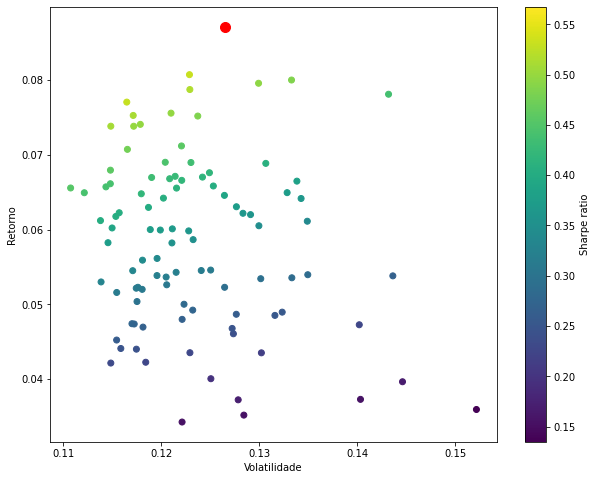

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);

In [ ]:
#exportar para excell
dataset.to_csv("dataset.csv")

## Otimização de portfólio com algoritmos de otimização



In [ ]:
!pip install mlrose

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scikit-learn==0.22

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mlrose

/usr/local/lib/python3.8/dist-packages/sklearn/externals/six.py:28: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



In [ ]:
taxa_selic_historico

array([1.75, 1.25, 1.25, 1.5 , 1.5 , 2.  ])

In [ ]:
dataset_original = pd.read_csv('acoes.csv')
dinheiro_total = 1000
sem_risco = taxa_selic_historico.mean() / 100

In [ ]:
def fitness_function(solucao):
  dataset = dataset_original.copy()
  pesos = solucao / solucao.sum()

  for i in dataset.columns[1:]:
    dataset[i] = (dataset[i] / dataset[i][0])

  for i, acao in enumerate(dataset.columns[1:]):
    dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

  dataset.drop(labels = ['Date'], axis = 1, inplace=True)
  dataset['soma valor'] = dataset.sum(axis = 1)
  dataset['taxa retorno'] = 0.0

  for i in range(1, len(dataset)):
    dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

  sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)

  return sharpe_ratio

In [ ]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.24914333, 0.00670306, 0.20467393, 0.24187022, 0.16102213,
       0.07261129, 0.06397604])

In [ ]:
fitness_function(pesos)

0.3564455250224622

In [ ]:
def visualiza_alocacao(solucao):
  colunas = dataset_original.columns[1:]
  for i in range(len(solucao)):
    print(colunas[i], solucao[i] * 100)

In [ ]:
visualiza_alocacao(pesos)

BRCO11.SA 24.914332749281414
FIIP11B.SA 0.6703061509499426
GGRC11.SA 20.46739330622125
HGLG11.SA 24.187021644471944
SDIL11.SA 16.102213380099645
VILG11.SA 7.26112865844941
VTLT11.SA 6.397604110526392


In [ ]:
fitness = mlrose.CustomFitness(fitness_function)

In [ ]:
problema_maximizacao = mlrose.ContinuousOpt(length=7, fitness_fn=fitness,
                                            maximize = True, min_val = 0, max_val = 1)

In [ ]:
problema_minimizacao = mlrose.ContinuousOpt(length=7, fitness_fn=fitness,
                                            maximize = False, min_val = 0, max_val = 1)

### Hill climb

In [ ]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state = 1)
melhor_solucao, melhor_custo

(array([0.        , 0.        , 0.        , 0.9       , 0.24675589,
        0.        , 0.        ]), 0.675722001749046)

In [ ]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.        , 0.        , 0.        , 0.78482265, 0.21517735,
        0.        , 0.        ]), 1.0)

In [ ]:
visualiza_alocacao(melhor_solucao)

BRCO11.SA 0.0
FIIP11B.SA 0.0
GGRC11.SA 0.0
HGLG11.SA 78.4822652499052
SDIL11.SA 21.517734750094792
VILG11.SA 0.0
VTLT11.SA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 1000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-94-aa0badd4cba0>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



1483.6035108035705

In [ ]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state = 1)
pior_solucao, pior_custo

(array([0.517022  , 0.        , 0.        , 0.        , 0.        ,
        0.19233859, 0.18626021]), -0.06910701866719907)

In [ ]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.57727779, 0.        , 0.        , 0.        , 0.        ,
        0.21475449, 0.20796771]), 1.0)

In [ ]:
visualiza_alocacao(pior_solucao)

BRCO11.SA 57.72777926100673
FIIP11B.SA 0.0
GGRC11.SA 0.0
HGLG11.SA 0.0
SDIL11.SA 0.0
VILG11.SA 21.47544948028419
VTLT11.SA 20.79677125870908


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 1000, melhores_pesos=pior_solucao)
soma_valor

<ipython-input-94-aa0badd4cba0>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



1060.8264379465968

#HILL com Mínimo


In [ ]:
problema_maximizacaom = mlrose.ContinuousOpt(length = 7, fitness_fn = fitness, 
                                               maximize = True, min_val = 0.1, max_val = 1)

In [ ]:
#melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacaom, random_state = 1)
#melhor_solucao, melhor_custo

In [ ]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0.        , 0.        , 0.        , 0.78482265, 0.21517735,
        0.        , 0.        ]), 1.0)

In [ ]:
visualiza_alocacao(melhor_solucao)

BRCO11.SA 0.0
FIIP11B.SA 0.0
GGRC11.SA 0.0
HGLG11.SA 78.4822652499052
SDIL11.SA 21.517734750094792
VILG11.SA 0.0
VTLT11.SA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 1000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-94-aa0badd4cba0>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



1483.6035108035705

### Simulated annealing

In [ ]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.  , 0.  , 0.  , 0.75, 0.25, 0.  , 0.  ]), 0.6751631331050533)

In [ ]:
visualiza_alocacao(melhor_solucao)

BRCO11.SA 0.0
FIIP11B.SA 0.0
GGRC11.SA 0.0
HGLG11.SA 74.99999999999999
SDIL11.SA 25.0
VILG11.SA 0.0
VTLT11.SA 0.0


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 1000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-94-aa0badd4cba0>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



1478.3034068705706

### Algoritmo genético

In [ ]:
problema_maximizacao = mlrose.ContinuousOpt(length=7, fitness_fn=fitness,
                                            maximize = True, min_val = 0, max_val = 1)

In [ ]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao, random_state = 1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.00985074, 0.0312597 , 0.10240334, 0.45412507, 0.33402486,
        0.02098736, 0.04734892]), 0.589384309740027)

In [ ]:
visualiza_alocacao(melhor_solucao)

BRCO11.SA 0.985074415491548
FIIP11B.SA 3.125970207264149
GGRC11.SA 10.240334262782543
HGLG11.SA 45.41250707690834
SDIL11.SA 33.402485925628426
VILG11.SA 2.098735732114523
VTLT11.SA 4.734892379810464


In [ ]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes.csv'), 1000, melhores_pesos=melhor_solucao)
soma_valor

<ipython-input-94-aa0badd4cba0>:24: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



1381.9207245898988